In [1]:
import pandas as pd

zooniverse_df = pd.read_csv("./segment_non_stars-classifications.csv")
zooniverse_df  = zooniverse_df[zooniverse_df['workflow_id']==25237]

In [2]:
import numpy as np

np.unique(zooniverse_df['user_name']), np.unique(zooniverse_df['workflow_id'])

(array(['not-logged-in-02cad8012e37fb3edd5e',
        'not-logged-in-1f01a6c9241b43559db0',
        'not-logged-in-5288a91c3048d611d959', 'ori_j'], dtype=object),
 array([25237]))

In [3]:
zooniverse_df

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,513195000,ori_j,2653324.0,5e366863292a31442166,25237,segment_non_stars,12.700,2023-09-27 14:22:53 UTC,NaN,NaN,"{""source"":""api"",""session"":""a39392b03376f0ac439...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""458030"":{""retired"":null,""link"":""https://www....",458030
1,513195146,ori_j,2653324.0,5e366863292a31442166,25237,segment_non_stars,12.700,2023-09-27 14:23:30 UTC,NaN,NaN,"{""source"":""api"",""session"":""a39392b03376f0ac439...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""458042"":{""retired"":null,""link"":""https://www....",458042
2,513198722,ori_j,2653324.0,3e77473973e26779ce87,25237,segment_non_stars,12.700,2023-09-27 14:40:58 UTC,NaN,NaN,"{""source"":""api"",""session"":""a39392b03376f0ac439...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""458026"":{""retired"":null,""link"":""https://www....",458026
3,513336188,ori_j,2653324.0,475a589f166f79de073c,25237,segment_non_stars,12.700,2023-09-28 07:57:27 UTC,NaN,NaN,"{""source"":""api"",""session"":""1fab85974bbb173cc45...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""92073600"":{""retired"":null,""Filename"":""ds9.pn...",92073600
4,513337966,ori_j,2653324.0,12dd923de395ba8723d4,25237,segment_non_stars,20.180,2023-09-28 08:23:43 UTC,NaN,NaN,"{""source"":""api"",""session"":""8af14c37bb6fb75ee96...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""92073600"":{""retired"":null,""Filename"":""ds9.pn...",92073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,548623192,ori_j,2653324.0,2c91efb6f63638db6694,25237,segment_non_stars,145.244,2024-03-19 11:27:44 UTC,NaN,NaN,"{""source"":""api"",""session"":""76822319cebabd5f6d3...","[{""task"":""T2"",""task_label"":""Does the image hav...","{""96758904"":{""retired"":{""id"":125809522,""workfl...",96758904
71,548623238,ori_j,2653324.0,2c91efb6f63638db6694,25237,segment_non_stars,145.244,2024-03-19 11:28:15 UTC,NaN,NaN,"{""source"":""api"",""session"":""76822319cebabd5f6d3...","[{""task"":""T2"",""task_label"":""Does the image hav...","{""96758764"":{""retired"":{""id"":125809550,""workfl...",96758764
72,549566098,ori_j,2653324.0,c1f2fb2a1012964f8d10,25237,segment_non_stars,145.244,2024-03-22 15:08:02 UTC,NaN,NaN,"{""source"":""api"",""session"":""fb6d0e5979ec7e25454...","[{""task"":""T2"",""task_label"":""Does the image hav...","{""96759022"":{""retired"":{""id"":125809538,""workfl...",96759022
73,549566108,ori_j,2653324.0,c1f2fb2a1012964f8d10,25237,segment_non_stars,145.244,2024-03-22 15:08:05 UTC,NaN,NaN,"{""source"":""api"",""session"":""fb6d0e5979ec7e25454...","[{""task"":""T2"",""task_label"":""Does the image hav...","{""96759111"":{""retired"":{""id"":125809579,""workfl...",96759111


convert csv string column to list

In [4]:
import json
zooniverse_df['annotations'] = zooniverse_df['annotations'].apply(lambda x:json.loads(x))

In [11]:
zooniverse_df['subject_data'] = zooniverse_df['subject_data'].apply(lambda x:json.loads(x))

In [12]:
zooniverse_df['annotations'][0][0].keys()

dict_keys(['task', 'task_label', 'value'])

In [13]:
task_labels = []

for annot in zooniverse_df['annotations']:
    if annot[0]['task_label'] not in task_labels:
        task_labels.append(annot[0]['task_label'])

In [14]:
task_labels

['Draw a mask (shape) of an artifact which has not been detected by initial model. ',
 'Segment an ARTEFACT or other objects different than stars. ',
 'Does the image have artefacts in it? If yes, how faint are they?',
 'Does the image have artefacts in it?']

In [15]:
k=0
for i in range(len(zooniverse_df['annotations'])):
    if zooniverse_df['annotations'][i][0]['task_label'] == 'Does the image have artefacts in it?' and \
     zooniverse_df['annotations'][i][0]['value'] in ['The image has artefacts. ', 'The image has **NO** artefacts.']:
        k+=1
        if len(zooniverse_df['annotations'][i])==1: # usually 'The image has **NO** artefacts.'
            print(zooniverse_df['annotations'][i][0]['value'], zooniverse_df['subject_data'][i])

The image has artefacts.  {'96236334': {'retired': None, 'metadata': 'S0652510101_L.png'}}
The image has **NO** artefacts. {'96281102': {'retired': None, 'metadata': 'S0094380601_S.png'}}
The image has **NO** artefacts. {'96281332': {'retired': None, 'metadata': 'S0674380501_M.png'}}
The image has **NO** artefacts. {'96281253': {'retired': None, 'metadata': 'S0693970301_M.png'}}
The image has **NO** artefacts. {'96280908': {'retired': {'id': 124903205, 'workflow_id': 25237, 'classifications_count': 1, 'created_at': '2024-02-08T21:15:48.071Z', 'updated_at': '2024-02-22T18:07:50.922Z', 'retired_at': '2024-02-22T18:07:50.907Z', 'subject_id': 96280908, 'retirement_reason': 'classification_count'}, 'metadata': 'S0201130201_S.png'}}
The image has **NO** artefacts. {'96281353': {'retired': {'id': 124903443, 'workflow_id': 25237, 'classifications_count': 1, 'created_at': '2024-02-08T21:23:43.831Z', 'updated_at': '2024-02-22T18:19:30.495Z', 'retired_at': '2024-02-22T18:19:30.487Z', 'subject_id'

In [164]:
from dataset import dataset_utils

In [180]:
for i in range(len(zooniverse_df['annotations'])):
    if zooniverse_df['annotations'][i][0]['task_label'] == 'Does the image have artefacts in it?' and \
     zooniverse_df['annotations'][i][0]['value'] in ['The image has artefacts. ', 'The image has **NO** artefacts.']:
        subject_data_key = list(zooniverse_df['subject_data'][i])[0] # Python 3.7 or later
        subject_data_key = zooniverse_df['subject_data'][i][subject_data_key]
        # print(subject_data_key)
        if 'metadata' in subject_data_key:
            image_name = subject_data_key['metadata'] 
        elif 'Observation' in subject_data_key:
            image_name = subject_data_key['Observation'] 
            annot = zooniverse_df['annotations'][i]
            if len(annot) <=1: # usually no annotations in the image or 'The image has **NO** artefacts.'
                if image_name not in no_artefacts_images:
                    no_artefacts_images.append(image_name)
            else:
                print(annot)
                image = cv2.imread(images_dir+image_name+'.png')
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                masks, gt_classes, boxes = [], [], []
                for i in range(len(annot[1]['value'])):
                    value_key = annot[1]['value'][i]
                    tool_label = value_key['tool_label']
                    tool = value_key['tool']
                    frame = value_key['frame']
                    details = value_key['details']


[{'task': 'T2', 'task_label': 'Does the image have artefacts in it?', 'value': 'The image has artefacts. '}, {'task': 'T0', 'task_label': 'Segment an ARTEFACT or other objects (not stars). ', 'value': [{'tool': 2, 'frame': 0, 'points': [{'x': 508.8, 'y': 472}, {'x': 508.7, 'y': 472}, {'x': 508.2, 'y': 472}, {'x': 507.3, 'y': 472}, {'x': 501.4, 'y': 472}, {'x': 499.7, 'y': 472}, {'x': 497.7, 'y': 472}, {'x': 496.5, 'y': 472}, {'x': 495.8, 'y': 472}, {'x': 494.8, 'y': 472}, {'x': 494.1, 'y': 472}, {'x': 493.4, 'y': 472}, {'x': 492.7, 'y': 472}, {'x': 492.2, 'y': 472}, {'x': 491.5, 'y': 472}, {'x': 490.9, 'y': 471.8}, {'x': 490.4, 'y': 471.6}, {'x': 489.9, 'y': 471.6}, {'x': 489.5, 'y': 471.4}, {'x': 489.1, 'y': 471.2}, {'x': 488.6, 'y': 471}, {'x': 488.3, 'y': 470.9}, {'x': 487.9, 'y': 470.9}, {'x': 487.4, 'y': 470.8}, {'x': 487, 'y': 470.8}, {'x': 486.8, 'y': 470.7}, {'x': 486.6, 'y': 470.5}, {'x': 486.2, 'y': 470.5}, {'x': 485.8, 'y': 470.4}, {'x': 485.4, 'y': 470.4}, {'x': 485, 'y': 4

In [181]:
# value
# 0:central-ring
# 1:read-out-streak
# 2:smoke-ring
# 3:star-loop
# 4:other

In [194]:
values_dict = {
    0:'central-ring',
    1:'read-out-streak',
    2:'smoke-ring',
    3:'star-loop',
    4:'other'}

label central-ring


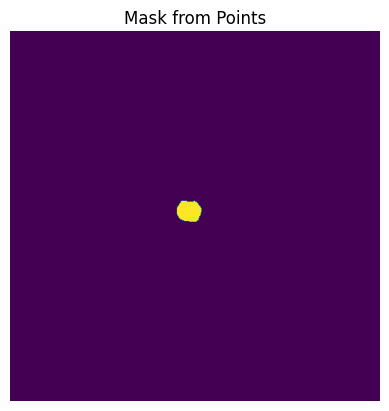

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label central-ring


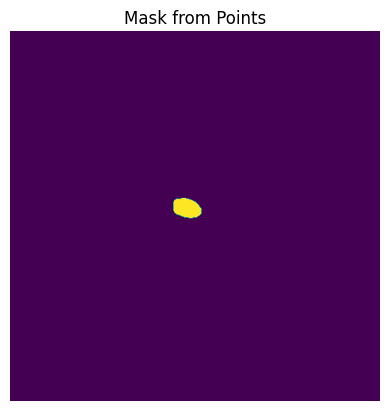

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


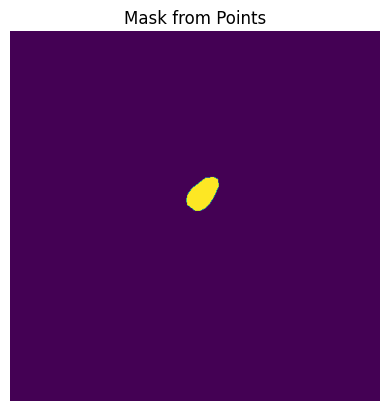

0 dict_keys(['tool', 'frame', 'closed', 'points', 'details', 'tool_label']) Polygon
label star-loop


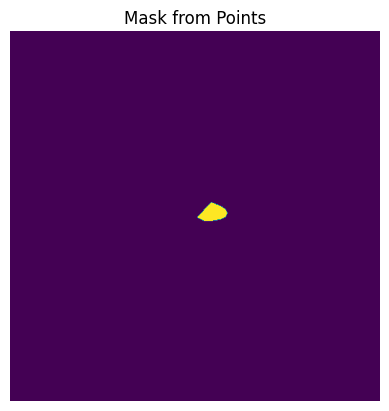

0 dict_keys(['tool', 'frame', 'closed', 'points', 'details', 'tool_label']) Polygon
label smoke-ring


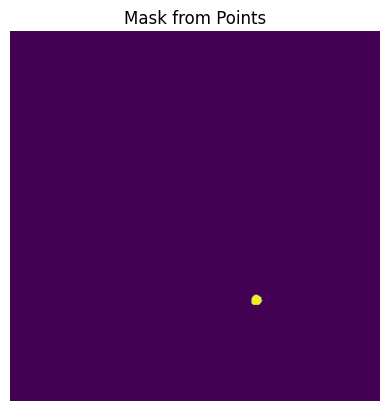

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label central-ring


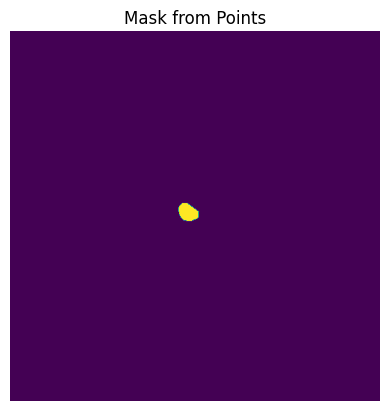

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


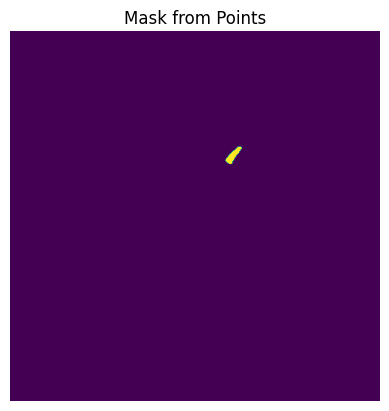

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label central-ring


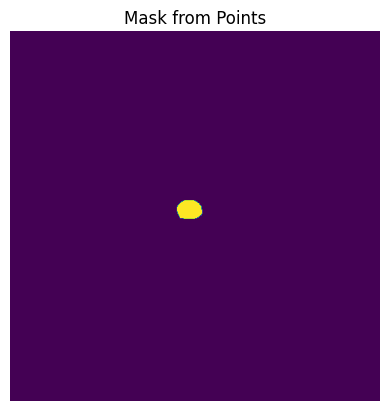

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label central-ring


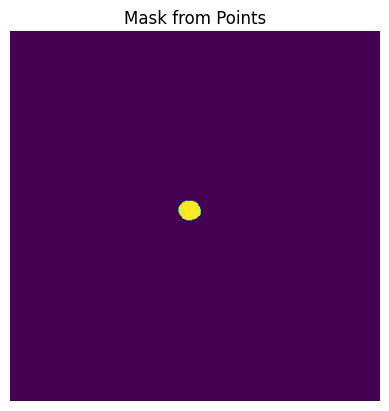

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


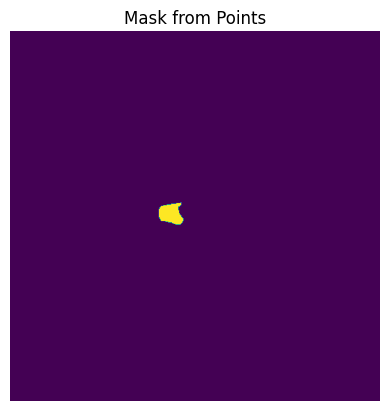

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


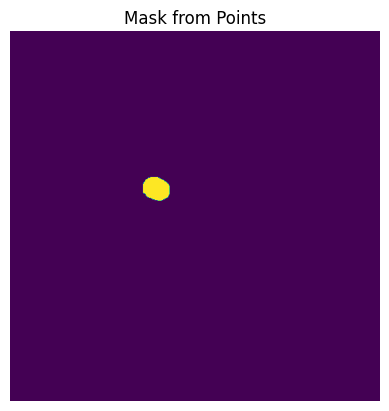

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label central-ring


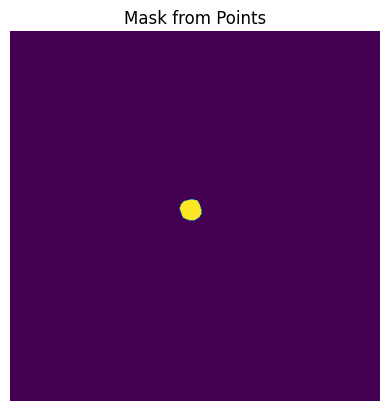

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label read-out-streak


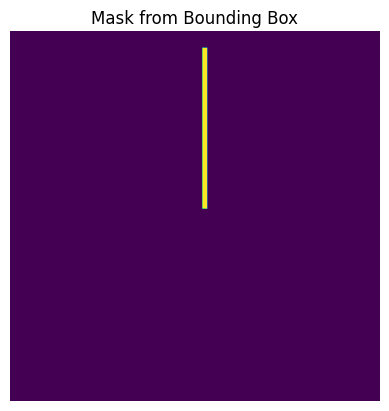

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label read-out-streak


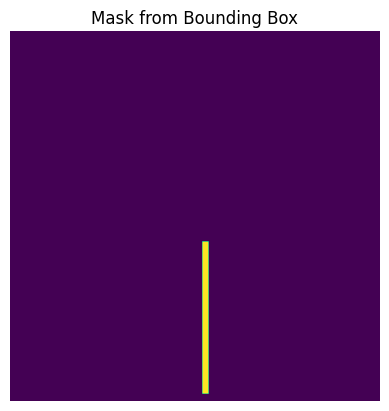

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label star-loop


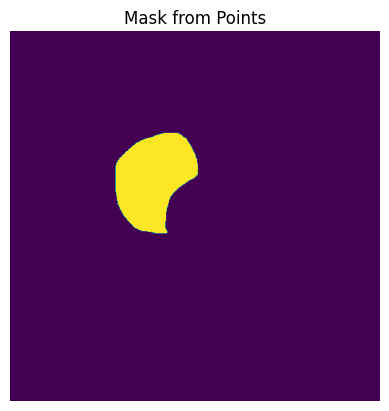

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


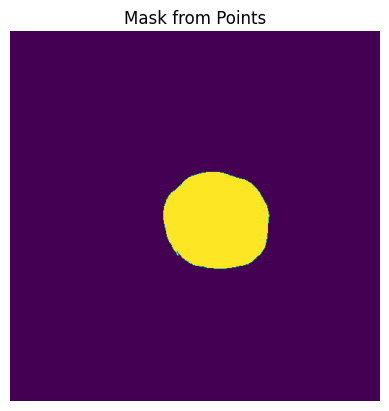

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label read-out-streak


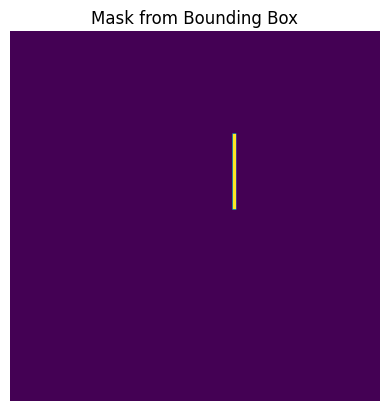

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label read-out-streak


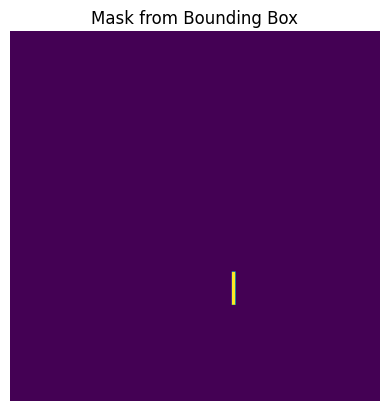

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label smoke-ring


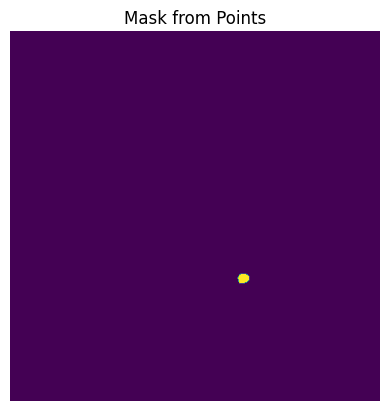

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label read-out-streak


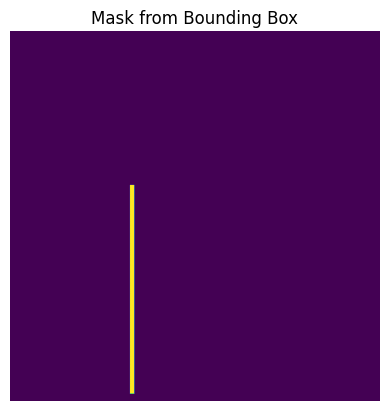

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label smoke-ring


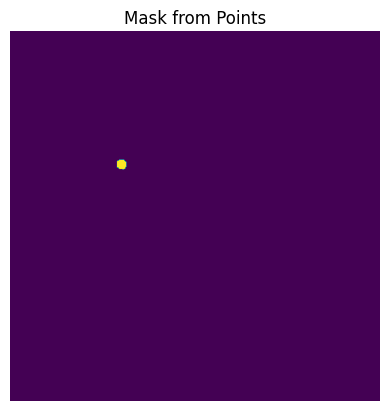

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label read-out-streak


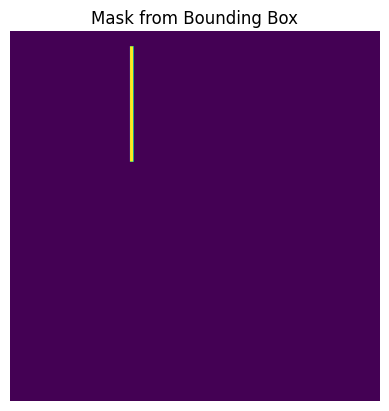

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label star-loop


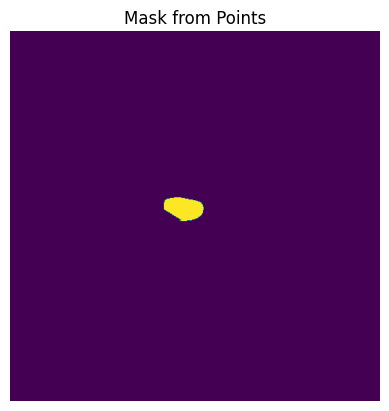

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


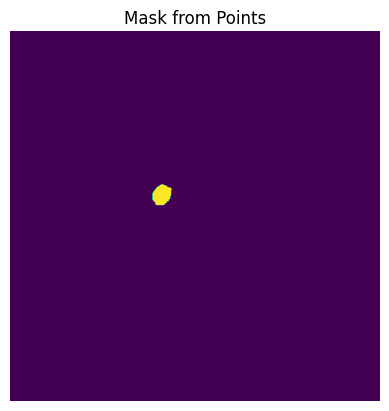

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


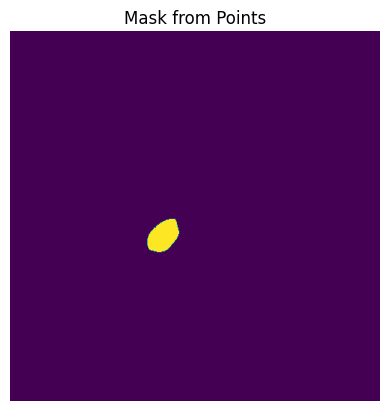

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


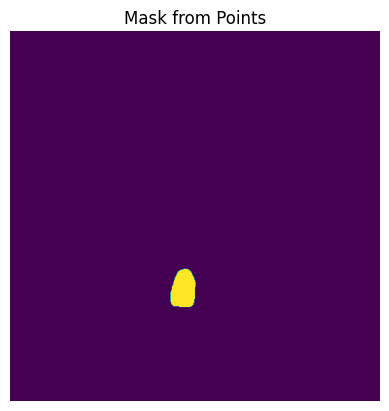

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label other


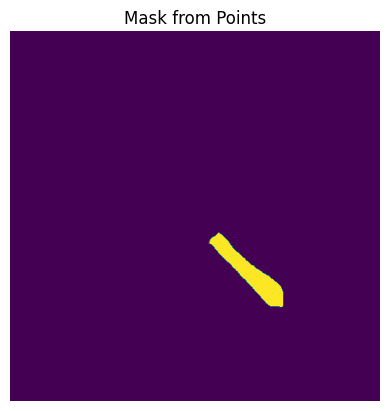

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label other


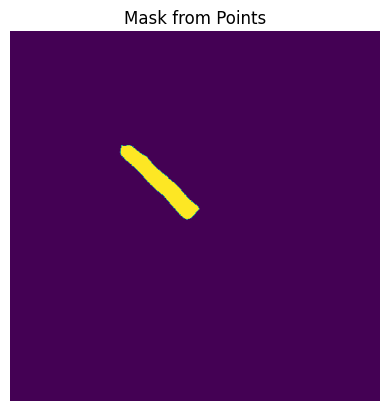

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label read-out-streak


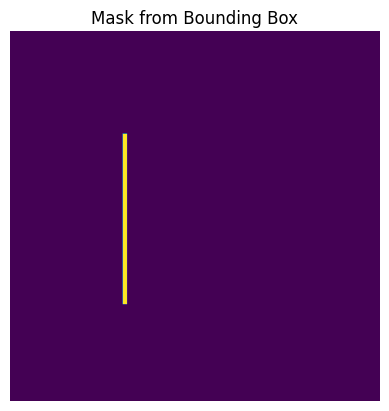

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label smoke-ring


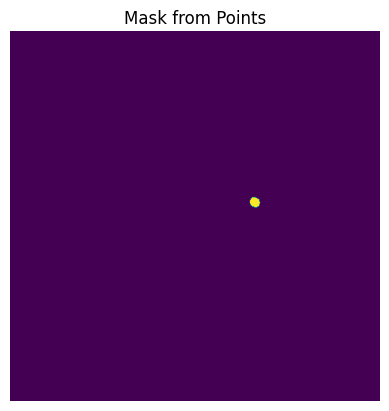

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label read-out-streak


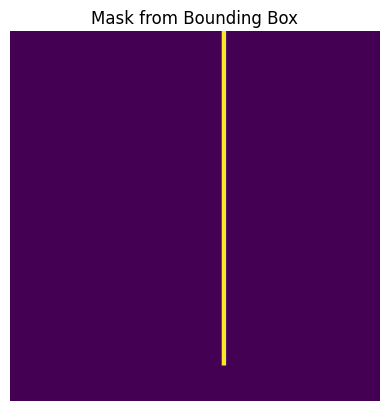

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label read-out-streak


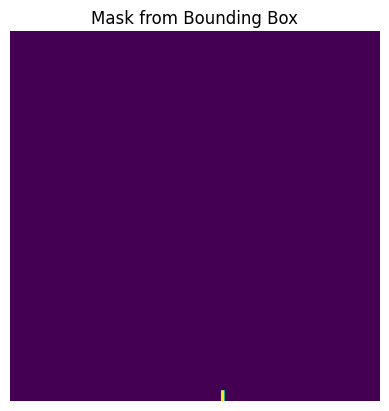

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label central-ring


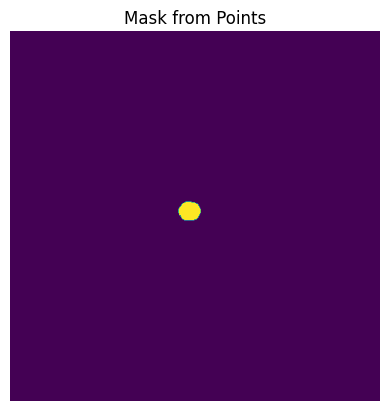

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label smoke-ring


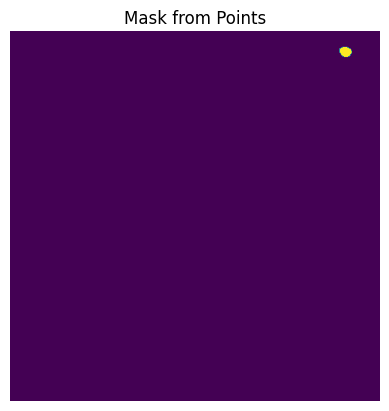

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label read-out-streak


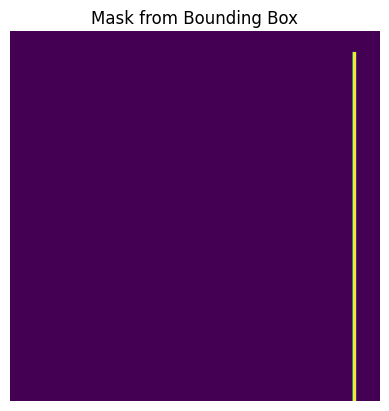

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
label star-loop


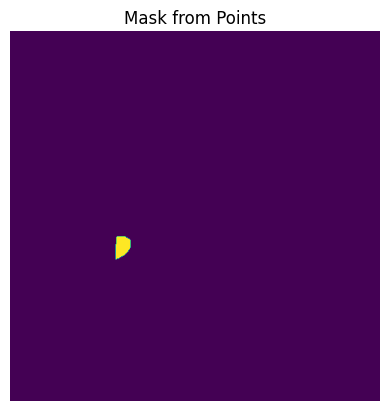

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label star-loop


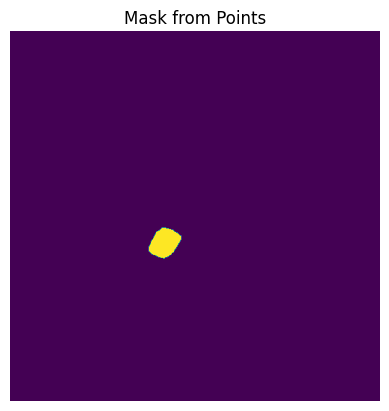

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
label central-ring


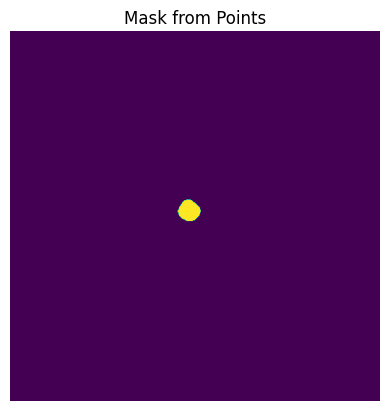

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form


In [198]:
import matplotlib.pyplot as plt
import cv2
k=0

images_dict = {}

images_dir = '../XMM_OM_dataset/zscaled_512_stretched/'
no_artefacts_images = []
for i in range(len(zooniverse_df['annotations'])):
    if zooniverse_df['annotations'][i][0]['task_label'] == 'Does the image have artefacts in it?' and \
     zooniverse_df['annotations'][i][0]['value'] in ['The image has artefacts. ', 'The image has **NO** artefacts.']:
        subject_data_key = list(zooniverse_df['subject_data'][i])[0] # Python 3.7 or later
        subject_data_key = zooniverse_df['subject_data'][i][subject_data_key]
        if 'metadata' in subject_data_key:
            image_name = subject_data_key['metadata'] 
        elif 'Observation' in subject_data_key:
            image_name = subject_data_key['Observation'] 
            annot = zooniverse_df['annotations'][i]
            if len(annot) <=1: # usually no annotations in the image or 'The image has **NO** artefacts.'
                if image_name not in no_artefacts_images:
                    no_artefacts_images.append(image_name)
            else:
                image = cv2.imread(images_dir+image_name+'.png')
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                masks, gt_classes, boxes = [], [], []
                for i in range(len(annot[1]['value'])):
                    value_key = annot[1]['value'][i]
                    tool_label = value_key['tool_label']
                    tool = value_key['tool']
                    frame = value_key['frame']
                    details = value_key['details']

                    # 0:Polygon
                    # 1:Bounding box (useful for **read-out-streaks**)
                    # 2:Free form
                    
                    print('label', values_dict[details[0]['value']])
                    gt_classes.append(values_dict[details[0]['value']])
                    if tool in [0, 2]:
                        points = value_key['points']
                        pts = np.array([[point['x']/1024.0*512, point['y']/1024.0*512] for point in points])
                        pts = np.append(pts, [pts[0]], axis=0)
                        pts = np.around(pts) # mathematically round coords
                        pts = np.array(pts, dtype=np.int32)
                        
                        shape = (512, 512)  
                        mask = np.zeros(shape, np.int16)
                        cv2.fillPoly(mask, [pts], color=(255))
                        masks.append(mask)
                        mask_to_bbox = dataset_utils.mask_to_bbox(mask) # results in XYXY
                        boxes.append(mask_to_bbox)

                        plt.imshow(mask)  # Display the mask in grayscale
                        plt.title('Mask from Points')
                        plt.axis('off')  # Hide axis ticks and labels
                        plt.show()
                    else: 
                        bbox_coords = [value_key['x']/1024.0*512, value_key['y']/1024.0*512, value_key['width']/1024.0*512, value_key['height']/1024.0*512]
                        bbox_coords = np.around(bbox_coords) # mathematically round coords
                        bbox_coords = np.array(bbox_coords, dtype=np.int16)
                        mask_shape = (512, 512) 
                        mask = np.zeros(mask_shape, dtype=np.uint8)
                        
                        # Draw a filled rectangle on the mask where the bounding box is
                        cv2.rectangle(
                            mask, 
                            (bbox_coords[0], bbox_coords[1]), 
                            (bbox_coords[2]+bbox_coords[0], bbox_coords[3]+bbox_coords[1]), 
                            color=(255), 
                            thickness=cv2.FILLED)

                        masks.append(mask)
                        boxes.append([bbox_coords[0], bbox_coords[1], bbox_coords[2]+bbox_coords[0], bbox_coords[3]+bbox_coords[1]])
                        
                        # Display the mask
                        plt.imshow(mask)
                        plt.title('Mask from Bounding Box')
                        plt.axis('off')
                        plt.show()

                    # gather info per image
                    images_dict[image_name+'.png'] = {'masks': np.array(masks), 
                                                      'boxes': np.array(boxes), 
                                                      'classes':np.array(gt_classes)}
                    
                    print(tool, annot[1]['value'][i].keys(), tool_label)
        else:
            print("NO metadata", zooniverse_df['annotations'][i])
            
        if annot_key['retired'] == None:
            print('Retired', image_name)
            continue
        

In [199]:
images_dict#['S0742830141_L.png']['masks'].shape

{'S0820080401_L.png': {'masks': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]], dtype=int16),
  'boxes': array([[231, 235, 264, 263]]),
  'classes': array(['central-ring'], dtype='<U12')},
 'S0655343836_L.png': {'masks': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]], dtype=int16),
  'boxes': array([[226, 231, 264, 258]]),
  'classes': array(['central-ring'], dtype='<U12')},
 'S0727780101_B.png': {'masks': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         

loading Roboflow workspace...
loading Roboflow project...
S0820080401_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


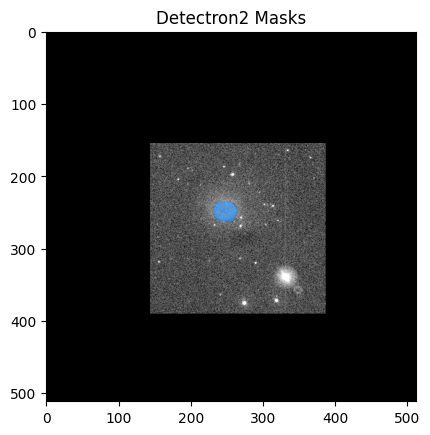

S0655343836_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


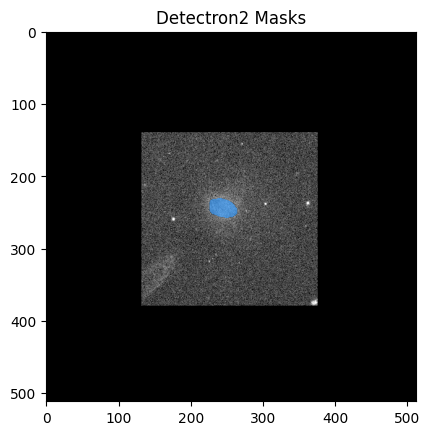

S0727780101_B.png
 Generated xml with annotations in VOC format. Check the coordinates! 


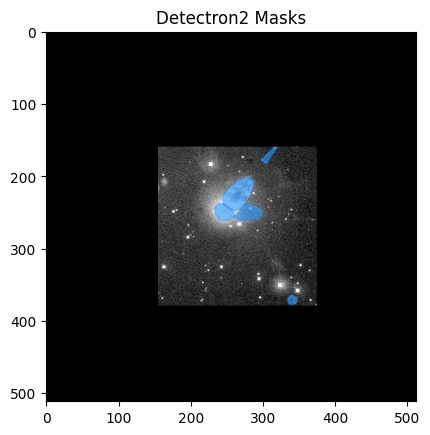

S0742830141_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


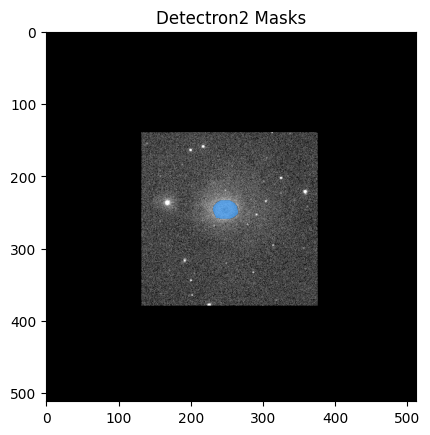

S0891801501_U.png
 Generated xml with annotations in VOC format. Check the coordinates! 


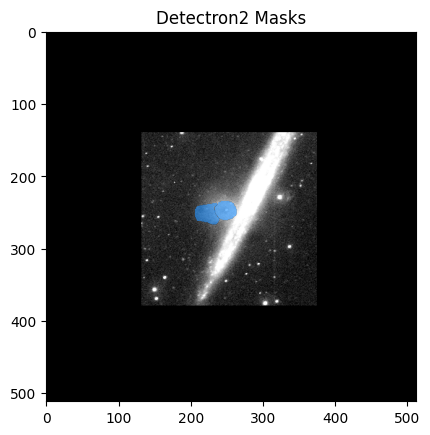

S0109661101_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


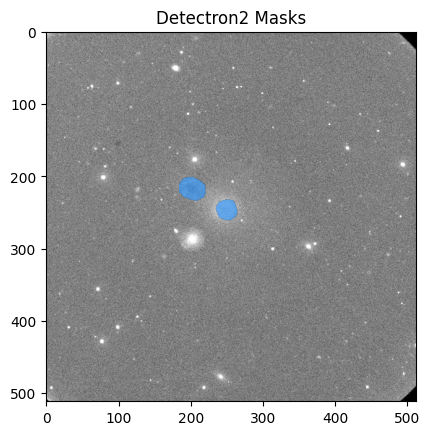

S0144271401_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


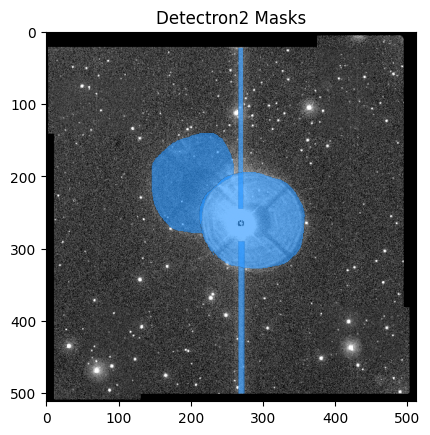

S0606321301_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


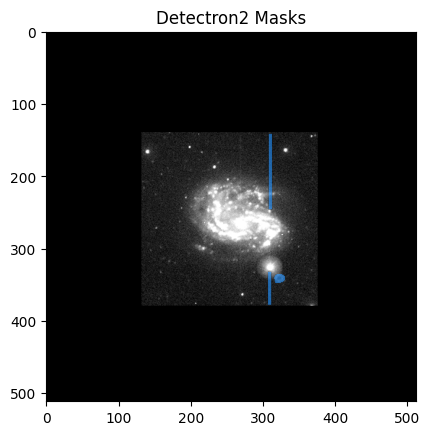

S0054540101_S.png
 Generated xml with annotations in VOC format. Check the coordinates! 


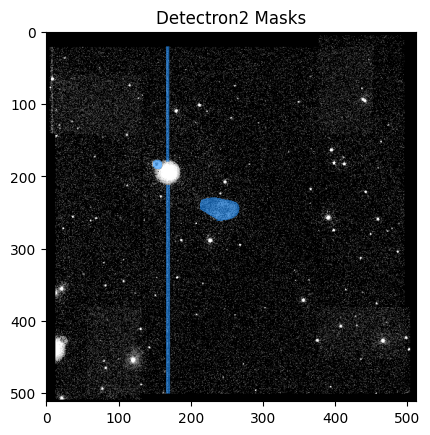

S0400920101_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


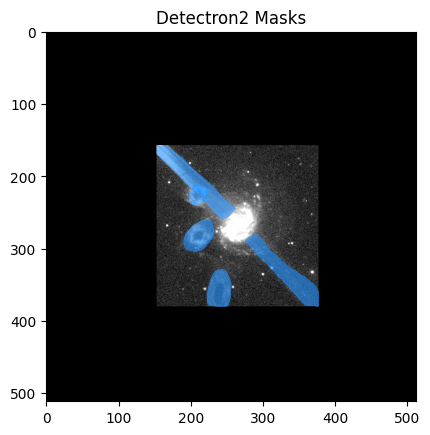

S0851980101_U.png
 Generated xml with annotations in VOC format. Check the coordinates! 


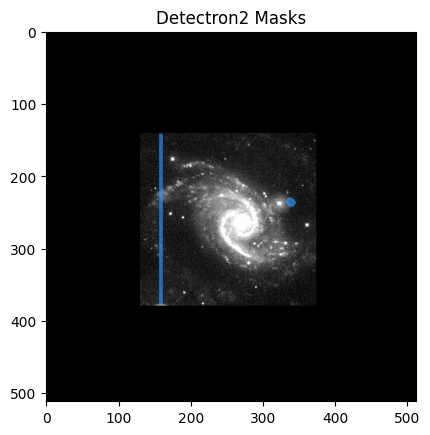

S0502860101_M.png
 Generated xml with annotations in VOC format. Check the coordinates! 


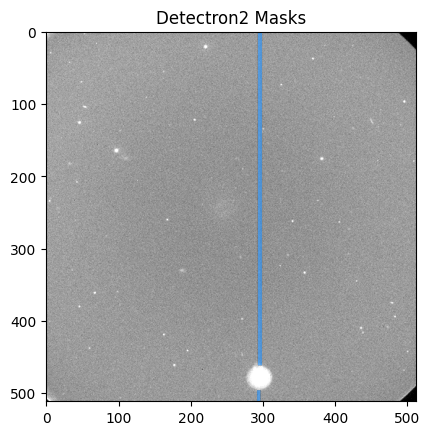

S0303110401_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


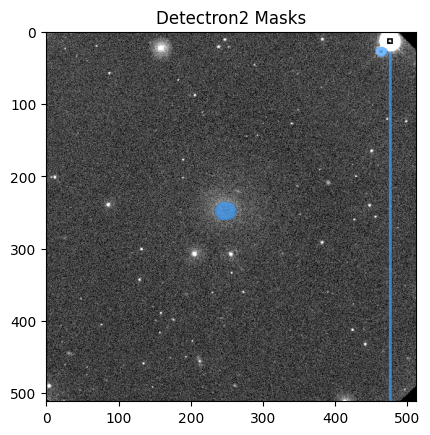

S0892000101_L.png
 Generated xml with annotations in VOC format. Check the coordinates! 


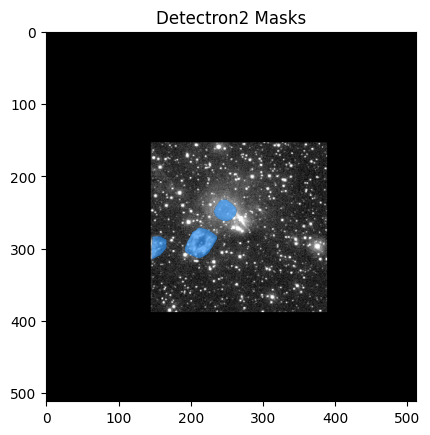

Segmentation of all images completed.


In [215]:
import glob
from roboflow import Roboflow
import os
from dataset import voc_annotate_and_Roboflow_export
import cv2
export_to_Roboflow = True

if export_to_Roboflow:
    # Initialize Roboflow client
    rf = Roboflow(api_key="EBeK30tpU3HW2VGGl0xa")
    upload_project = rf.workspace("iuliaelisa").project("xmm_om_artefacts_512") # error if the project doesn't exist
    
def export_image_det_to_Roboflow(input_dir, filename, masks, classes, boxes):
    
    objects = []
    for i in range(len(masks)):
        mask_np = masks[i]/255 # [H, W]
        polygon = voc_annotate_and_Roboflow_export.binary_image_to_polygon(mask_np)
        objects.append({
            'name': classes[i],
            'bbox': boxes[i],
            'segmentations': polygon[0]
        })
        
    if len(objects)>0:
        voc_annotate_and_Roboflow_export.create_annotation_SAM(
            filename=filename, 
            width=512, 
            height=512, 
            depth=3, 
            objects=objects, 
            offset= 1.5) # generating xml file for VOC format
        image_path = input_dir+filename
        annotation_filename = filename.replace(".png", ".xml")
        upload_project.upload(image_path, annotation_filename, overwrite=True)
        # os.remove(annotation_filename)
    else:
        print("No objects after label filtering.")
    
for image_filename, annots in images_dict.items():
    print(image_filename)
    image_path = os.path.join(images_dir, image_filename)
    new_im = cv2.imread(image_path)
    if export_to_Roboflow:
        export_image_det_to_Roboflow(images_dir, image_filename, annots['masks'], annots['classes'], annots['boxes'])
    
    plt.imshow(new_im)
    plt.title('Detectron2 Masks')
    dataset_utils.show_masks(annots['masks']/255, plt.gca()) #, random_color=True)
    # plt.savefig('./plots/detr2_masks.png')
    plt.show()
    plt.close()

print("Segmentation of all images completed.")